# Counterfeit Medicines Sales Prediction

### Data Loading and pre processing

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import seaborn as sns

In [3]:
# reading the CSV file into pandas dataframe
datafile_train=r"C:\Users\isaac\Documents\Python Scripts\Project\Project 3 Public Safety\counterfeit_train.csv"
datafile_test=r"C:\Users\isaac\Documents\Python Scripts\Project\Project 3 Public Safety\counterfeit_test.csv"
bd_train=pd.read_csv(datafile_train)
bd_test=pd.read_csv(datafile_test)

In [4]:
bd_train.dtypes # Checking the type of the train dataset

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

In [5]:
bd_train.shape # Checking the shape of the train dataset

(6818, 12)

In [6]:
bd_train.info()  # Getting the info data types column wise

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [7]:
bd_test.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
dtype: object

In [8]:
bd_test.shape

(1705, 11)

In [7]:
# drop Medicine_ID
# get dummies - DistArea_ID, Medicine_Type, SidEffect_Level, Area_Type, Area_City_Type, Area_dist_level
# Counterfeit_Weight missing values replace with Median

In [9]:
bd_train['Area_dist_level'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Small
1        Medium
2         Small
3         Small
4         Small
         ...   
6813      Small
6814      Small
6815    Unknown
6816    Unknown
6817     Medium
Name: Area_dist_level, Length: 6818, dtype: object>

In [10]:
bd_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Counterfeit_Weight,5652.0,14.115057,4.649668,5.855,9.995000,13.800000,18.050000,22.650000
Active_Since,6818.0,1995.836316,8.368979,1983.000,1985.000000,1997.000000,2002.000000,2007.000000
Medicine_MRP,6818.0,151.401518,62.203961,41.790,104.509400,153.195700,196.148350,277.188400
Availability_rating,6818.0,0.079174,0.051481,0.013,0.040058,0.066955,0.107697,0.341391
Counterfeit_Sales,6818.0,2280.583480,1693.354404,146.290,933.265600,1902.670400,3207.638400,13199.964800


In [11]:
bd_train.describe(include=['object'])

,Medicine_ID,DistArea_ID,Medicine_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level
count,6818,6818,6818,6818,6818,6818,6818
unique,1557,10,16,2,4,3,4
top,SCK30,Area017,Hreplacements,mild,DownTown,Tier 3,Medium
freq,9,760,976,4434,4481,2655,2203


#### Correlation Heatmap

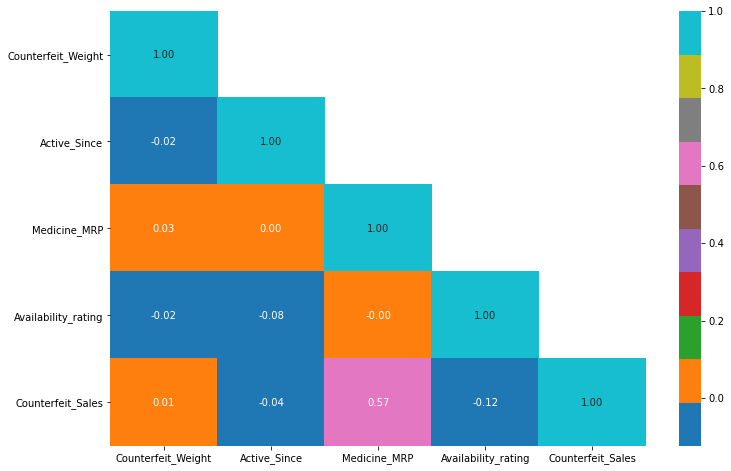

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(bd_train.corr(),annot=True,fmt='.2f',cmap='tab10',mask=np.triu(bd_train.corr(),+1))
plt.show()

#### How each feature affects the Counterfeit Sales

In [13]:
correlations = bd_train.corr()
correlations["Counterfeit_Sales"].sort_values(ascending=False)

Counterfeit_Sales      1.000000
Medicine_MRP           0.573684
Counterfeit_Weight     0.005959
Active_Since          -0.039595
Availability_rating   -0.124058
Name: Counterfeit_Sales, dtype: float64

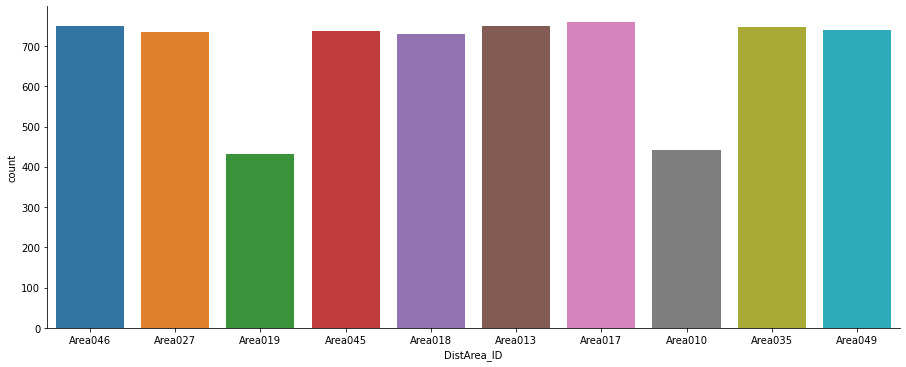

In [14]:
# EDA for categorical columns 'DistArea_ID'.
sns.catplot('DistArea_ID', data=bd_train, kind='count',aspect=2.5)

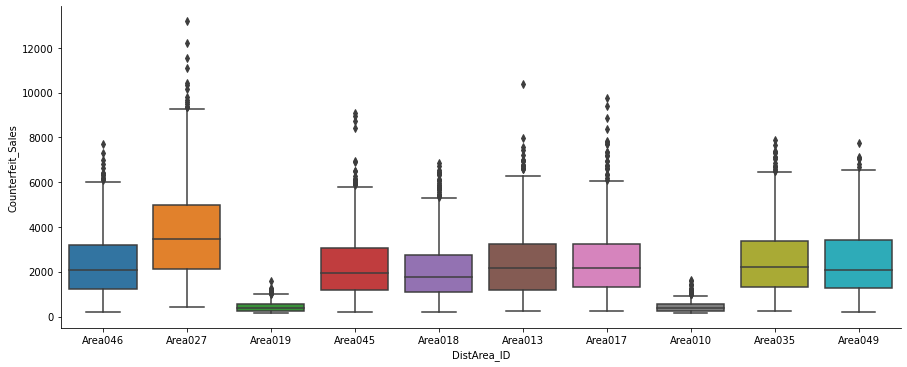

In [15]:
sns.catplot(x='DistArea_ID', y='Counterfeit_Sales', kind='box', data=bd_train, aspect=2.5)

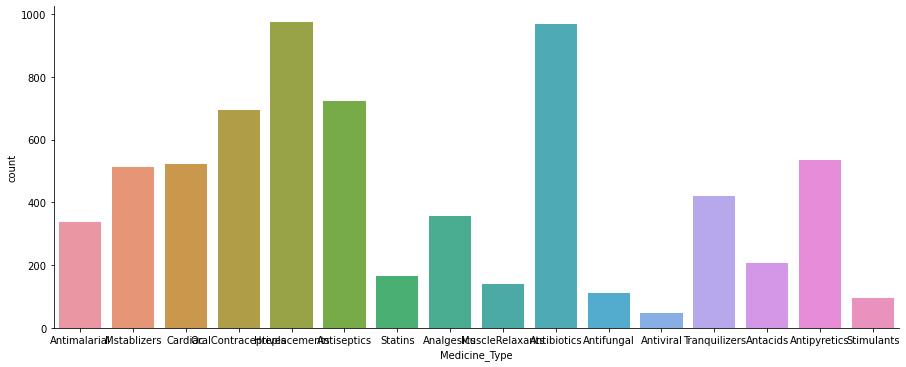

In [16]:
# EDA for categorical columns 'Medicine_Type'.
sns.catplot('Medicine_Type', data=bd_train, kind='count',aspect=2.5)

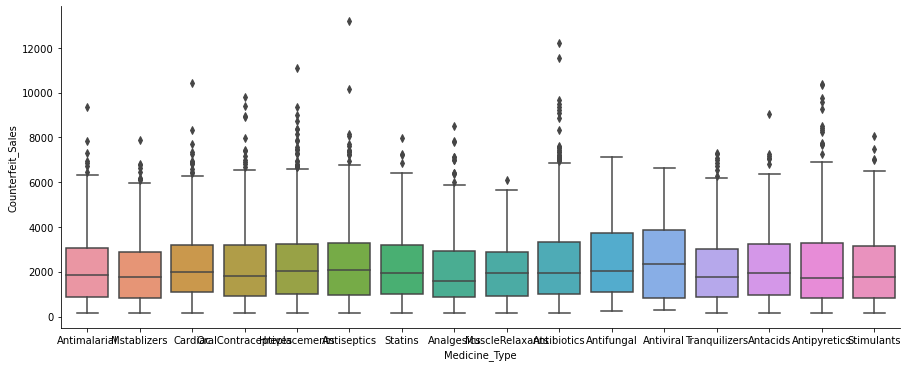

In [17]:
sns.catplot(x='Medicine_Type', y='Counterfeit_Sales', kind='box', data=bd_train, aspect=2.5)

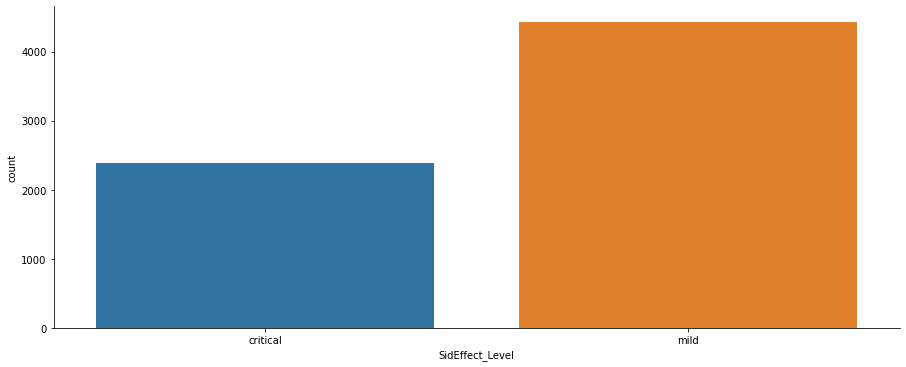

In [18]:
# EDA for categorical columns 'SidEffect_Level'.
sns.catplot('SidEffect_Level', data=bd_train, kind='count',aspect=2.5)

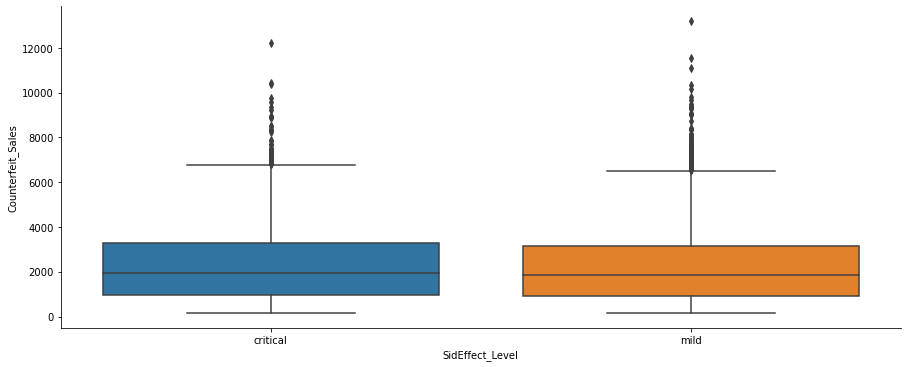

In [19]:
sns.catplot(x='SidEffect_Level', y='Counterfeit_Sales', kind='box', data=bd_train, aspect=2.5)

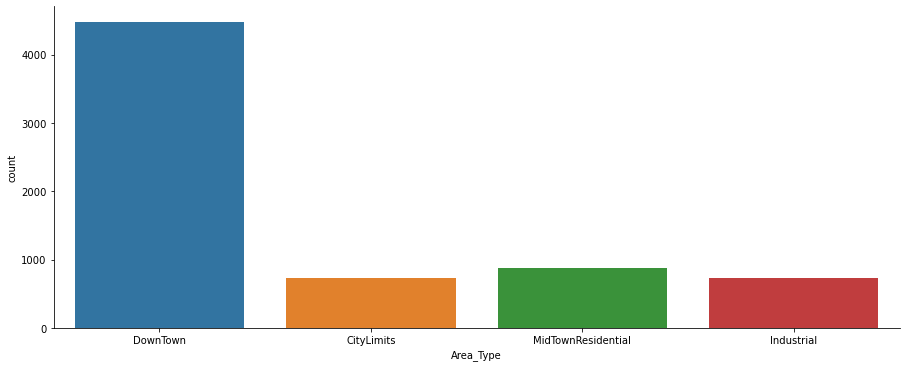

In [20]:
# EDA for categorical columns 'Area_Type'.
sns.catplot('Area_Type', data=bd_train, kind='count',aspect=2.5)

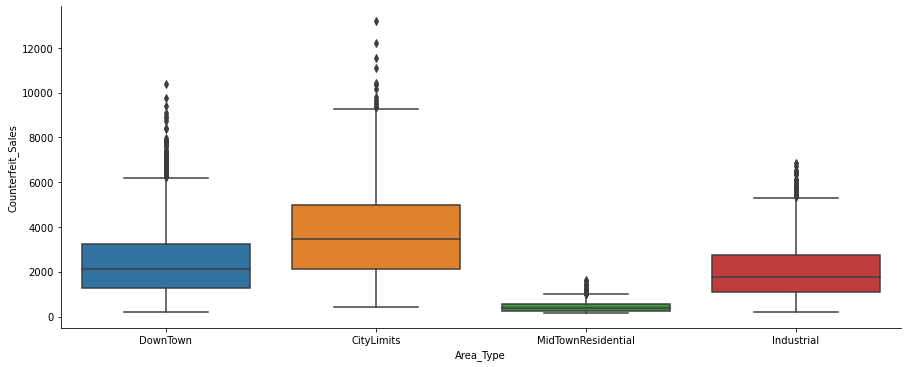

In [21]:
sns.catplot(x='Area_Type', y='Counterfeit_Sales', kind='box', data=bd_train, aspect=2.5)

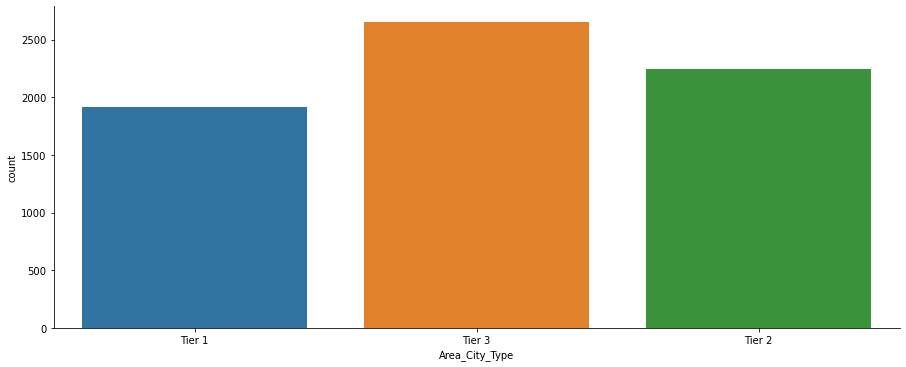

In [22]:
# EDA for categorical columns 'Area_City_Type'.
sns.catplot('Area_City_Type', data=bd_train, kind='count',aspect=2.5)

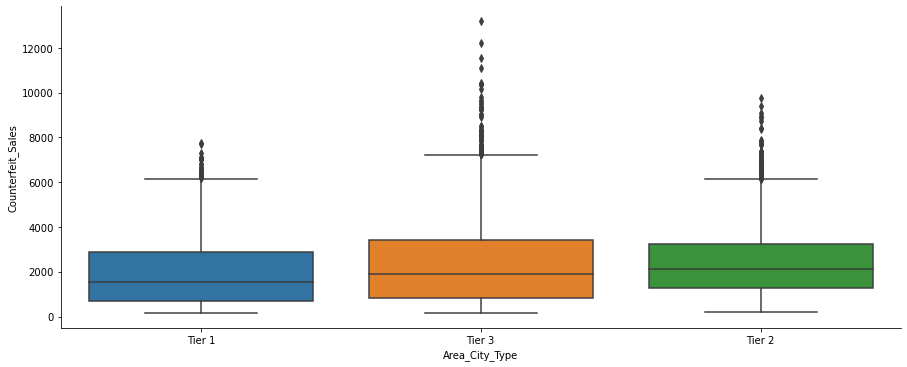

In [23]:
sns.catplot(x='Area_City_Type', y='Counterfeit_Sales', kind='box', data=bd_train, aspect=2.5)

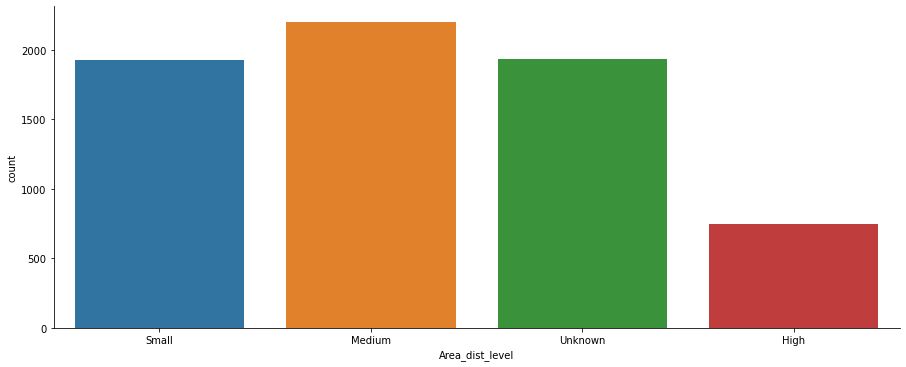

In [24]:
# EDA for categorical columns 'Area_dist_level'.
sns.catplot('Area_dist_level', data=bd_train, kind='count',aspect=2.5)

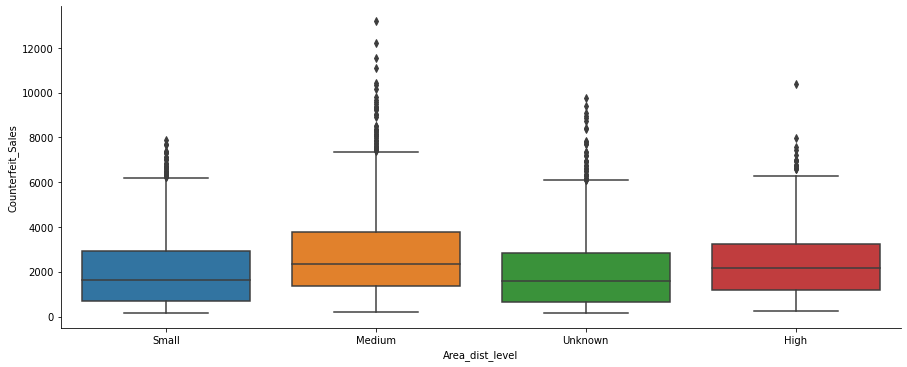

In [25]:
sns.catplot(x='Area_dist_level', y='Counterfeit_Sales', kind='box', data=bd_train, aspect=2.5)

In [10]:
for col in [ 'Medicine_ID']:
    bd_train.drop(col,1,inplace=True)
    bd_test.drop(col,1,inplace=True)

In [11]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from mypipes import *

In [10]:
p1=pdPipeline([
    ('var_select',VarSelector(['Counterfeit_Weight','Active_Since','Medicine_MRP','Availability_rating'])),
    ('missing_trt',DataFrameImputer())
])
p2=pdPipeline([
    ('var_select',VarSelector(['DistArea_ID', 'Medicine_Type','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level'])),
    ('missing_trt',DataFrameImputer()),
    ('create_dummies',get_dummies_Pipe(400))
])

In [11]:
data_pipe=FeatureUnion([
    ('num_var',p1),
    ('obj_to_dum',p2)
])

In [12]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(bd_train),
                     columns=data_pipe.get_feature_names())

In [13]:
x_train.shape

(6818, 30)

In [14]:
x_test=pd.DataFrame(data=data_pipe.transform(bd_test),
                     columns=data_pipe.get_feature_names())

In [15]:
x_test.shape

(1705, 30)

In [16]:
x_train.head()

,num_var__Counterfeit_Weight,num_var__Active_Since,num_var__Medicine_MRP,num_var__Availability_rating,obj_to_dum__DistArea_ID_Area017,obj_to_dum__DistArea_ID_Area013,obj_to_dum__DistArea_ID_Area046,obj_to_dum__DistArea_ID_Area035,obj_to_dum__DistArea_ID_Area049,obj_to_dum__DistArea_ID_Area045,...,obj_to_dum__Medicine_Type_Tranquilizers,obj_to_dum__SidEffect_Level_mild,obj_to_dum__Area_Type_DownTown,obj_to_dum__Area_Type_MidTownResidential,obj_to_dum__Area_Type_CityLimits,obj_to_dum__Area_City_Type_Tier 3,obj_to_dum__Area_City_Type_Tier 2,obj_to_dum__Area_dist_level_Medium,obj_to_dum__Area_dist_level_Unknown,obj_to_dum__Area_dist_level_Small
0,13.100,1995.0,160.2366,0.070422,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13.800,1983.0,110.4384,0.013000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9.025,1995.0,259.4092,0.060783,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,11.800,1995.0,99.9830,0.065555,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13.800,1983.0,56.4402,0.248859,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
x_test.head()

,num_var__Counterfeit_Weight,num_var__Active_Since,num_var__Medicine_MRP,num_var__Availability_rating,obj_to_dum__DistArea_ID_Area017,obj_to_dum__DistArea_ID_Area013,obj_to_dum__DistArea_ID_Area046,obj_to_dum__DistArea_ID_Area035,obj_to_dum__DistArea_ID_Area049,obj_to_dum__DistArea_ID_Area045,...,obj_to_dum__Medicine_Type_Tranquilizers,obj_to_dum__SidEffect_Level_mild,obj_to_dum__Area_Type_DownTown,obj_to_dum__Area_Type_MidTownResidential,obj_to_dum__Area_Type_CityLimits,obj_to_dum__Area_City_Type_Tier 3,obj_to_dum__Area_City_Type_Tier 2,obj_to_dum__Area_dist_level_Medium,obj_to_dum__Area_dist_level_Unknown,obj_to_dum__Area_dist_level_Small
0,13.80,1983.0,85.5328,0.112747,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,13.45,2000.0,257.1460,0.144446,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,7.10,2000.0,98.1172,0.144221,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,18.30,1996.0,135.3730,0.100388,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,13.80,1983.0,112.8016,0.022585,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
y_train=bd_train['Counterfeit_Sales']

### Splitting the training data for training and validation

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train = pd.concat([x_train, bd_train['Counterfeit_Sales']],axis =1)

In [21]:
x_train.head()

,num_var__Counterfeit_Weight,num_var__Active_Since,num_var__Medicine_MRP,num_var__Availability_rating,obj_to_dum__DistArea_ID_Area017,obj_to_dum__DistArea_ID_Area013,obj_to_dum__DistArea_ID_Area046,obj_to_dum__DistArea_ID_Area035,obj_to_dum__DistArea_ID_Area049,obj_to_dum__DistArea_ID_Area045,...,obj_to_dum__SidEffect_Level_mild,obj_to_dum__Area_Type_DownTown,obj_to_dum__Area_Type_MidTownResidential,obj_to_dum__Area_Type_CityLimits,obj_to_dum__Area_City_Type_Tier 3,obj_to_dum__Area_City_Type_Tier 2,obj_to_dum__Area_dist_level_Medium,obj_to_dum__Area_dist_level_Unknown,obj_to_dum__Area_dist_level_Small,Counterfeit_Sales
0,13.100,1995.0,160.2366,0.070422,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1775.5026
1,13.800,1983.0,110.4384,0.013000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3069.1520
2,9.025,1995.0,259.4092,0.060783,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2603.0920
3,11.800,1995.0,99.9830,0.065555,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1101.7130
4,13.800,1983.0,56.4402,0.248859,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,158.9402


In [22]:
a_train, a_test = train_test_split(x_train, test_size = 0.2, random_state=42)

In [23]:
x_train1=a_train.drop(['Counterfeit_Sales'],axis=1)
y_train1=a_train['Counterfeit_Sales']

In [24]:
x_train_test1=a_test.drop(['Counterfeit_Sales'],axis=1)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Lasso Regerssion

In [ ]:
params={'alpha':np.linspace(0.1,10,50)}

In [ ]:
lasmodel=Lasso(fit_intercept=True)

In [ ]:
grid_search=GridSearchCV(lasmodel,
                         cv=10,
                         param_grid=params,
                         n_jobs=-1,
                         verbose=10,
                         scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(x_train1,y_train1)

In [ ]:
grid_search.best_estimator_

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(grid_search.cv_results_,5)

In [ ]:
lasso_model=grid_search.best_estimator_

In [ ]:
lasso_model.fit(x_train1,y_train1)

In [ ]:
lasso_model.intercept_

In [ ]:
predlas=lasso_model.predict(x_train_test1)

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
MAE = mean_absolute_error(a_test['Counterfeit_Sales'],predlas)

In [ ]:
MAE

In [ ]:
Score = 1-(MAE/1660)

In [ ]:
Score

### Lasso regression with random search

In [ ]:
params={'alpha':np.linspace(0.1,10,50)}

In [ ]:
lasrdmodel=Lasso(fit_intercept=True)

In [ ]:
random_search=RandomizedSearchCV(lasrdmodel,
                                 cv=10,
                                 param_distributions=params,
                                 n_jobs=-1,
                                 verbose=10,
                                 scoring='neg_mean_absolute_error')

In [ ]:
random_search.fit(x_train1,y_train1)

In [ ]:
random_search.best_estimator_

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(random_search.cv_results_,5)

In [ ]:
lassors_model=random_search.best_estimator_

In [ ]:
lassors_model.fit(x_train1,y_train1)

In [ ]:
predlasrs=lassors_model.predict(x_train_test1)

In [ ]:
MAE = mean_absolute_error(a_test['Counterfeit_Sales'],predlasrs)

In [ ]:
MAE

In [ ]:
Score = 1-(MAE/1660)

In [ ]:
Score

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

### Decision Tree

In [27]:
params={ 
        'max_depth':[None,5,10,15,20],
            'min_samples_leaf':[1,2,5], 
            'min_samples_split':[2,5,8]
       }

In [28]:
reg=DecisionTreeRegressor()

In [29]:
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=params,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

In [30]:
random_search.fit(x_train1,y_train1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 8]},
                   scoring='neg_mean_absolute_error', verbose=20)

In [31]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [32]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -758.92778 (std: 27.72597)
Parameters: {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 5}

Model with rank: 2
Mean validation score: -759.50043 (std: 28.25240)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5}

Model with rank: 2
Mean validation score: -759.50043 (std: 28.25240)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}

Model with rank: 4
Mean validation score: -812.46445 (std: 39.57510)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 10}

Model with rank: 5
Mean validation score: -812.46586 (std: 39.57441)
Parameters: {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 10}



In [33]:
dtree=DecisionTreeRegressor(**{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5})

In [34]:
dtree.fit(x_train1,y_train1)

DecisionTreeRegressor(max_depth=5)

In [35]:
pred_dtree=dtree.predict(x_train_test1)

In [38]:
mean_absolute_error(a_test['Counterfeit_Sales'],pred_dtree)

756.6654928864681

In [39]:
MAE = mean_absolute_error(a_test['Counterfeit_Sales'],pred_dtree)

In [40]:
Score = 1-(MAE/1660)

### best score so far

In [41]:
Score

0.5441774139238145

In [42]:
x_train

,num_var__Counterfeit_Weight,num_var__Active_Since,num_var__Medicine_MRP,num_var__Availability_rating,obj_to_dum__DistArea_ID_Area017,obj_to_dum__DistArea_ID_Area013,obj_to_dum__DistArea_ID_Area046,obj_to_dum__DistArea_ID_Area035,obj_to_dum__DistArea_ID_Area049,obj_to_dum__DistArea_ID_Area045,...,obj_to_dum__SidEffect_Level_mild,obj_to_dum__Area_Type_DownTown,obj_to_dum__Area_Type_MidTownResidential,obj_to_dum__Area_Type_CityLimits,obj_to_dum__Area_City_Type_Tier 3,obj_to_dum__Area_City_Type_Tier 2,obj_to_dum__Area_dist_level_Medium,obj_to_dum__Area_dist_level_Unknown,obj_to_dum__Area_dist_level_Small,Counterfeit_Sales
0,13.100,1995.0,160.2366,0.070422,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1775.5026
1,13.800,1983.0,110.4384,0.013000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3069.1520
2,9.025,1995.0,259.4092,0.060783,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2603.0920
3,11.800,1995.0,99.9830,0.065555,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1101.7130
4,13.800,1983.0,56.4402,0.248859,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,158.9402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,8.535,1995.0,204.1452,0.112963,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2070.4520
6814,20.650,1995.0,235.1088,0.131103,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2126.3792
6815,20.000,2005.0,193.6292,0.105096,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2119.7212
6816,10.180,2000.0,162.8682,0.099957,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1485.2138


In [43]:
x_train=x_train.drop(['Counterfeit_Sales'],axis=1)

In [44]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [45]:
pred_dtree=dtree.predict(x_test)

In [48]:
test_pred_res = pd.DataFrame(pred_dtree)

In [46]:
data_test=r"C:\Users\isaac\Documents\Python Scripts\Project\Project 3 Public Safety\counterfeit_test.csv"
test_data=pd.read_csv(data_test)

In [49]:
final_res=pd.concat([test_data['Medicine_ID'],test_pred_res],axis=1)

In [50]:
final_res

,Medicine_ID,0
0,HLZ81,2008.029853
1,ECE94,4055.506813
2,SAD14,1589.413296
3,EQV63,498.403086
4,AIR10,394.210178
...,...,...
1700,KXW10,3314.665750
1701,CKE54,806.516933
1702,HAY13,3115.791218
1703,ZEE32,3476.129932


### Final Submission 2

In [51]:
pd.DataFrame(final_res).to_csv("mysubmissionrsdt02.csv",index=False)